## Import các thư viện cần thiết

In [1]:
import datetime as dt # Để làm việc với dữ liệu datetime
import math

## Đưa ra câu hỏi cần trả lời

Tình trạng hiểu về Python các bạn trong lớp?

## Thu thập dữ liệu

Cho làm quiz về Python trên moodle.

Kết quả có thể được download về dưới dạng file .csv.

## Khám phá dữ liệu

In [2]:
file = open('PythonQuiz_2024_CQ.csv', 'r', encoding='utf-8-sig')

cols = {}
first_line_vals = file.readline().rstrip().split(',')
for first_line_val in first_line_vals:
    cols[first_line_val] = []
for line in file:
    line_vals = line.rstrip().split(',')
    if line_vals[0]!='Never submitted':
        for i in range(len(line_vals)):
            cols[first_line_vals[i]].append(line_vals[i])

file.close()

cols.keys()

dict_keys(['State', 'Started on', 'Completed', 'Time taken', 'Grade/10.00', 'Q. 1 /0.53', 'Q. 2 /0.53', 'Q. 3 /0.53', 'Q. 4 /0.53', 'Q. 5 /0.53', 'Q. 6 /0.53', 'Q. 7 /0.53', 'Q. 8 /0.53', 'Q. 9 /0.53', 'Q. 10 /0.53', 'Q. 11 /0.53', 'Q. 12 /0.53', 'Q. 13 /0.53', 'Q. 14 /0.53', 'Q. 15 /0.53', 'Q. 16 /0.53', 'Q. 17 /0.53', 'Q. 18 /0.53', 'Q. 19 /0.53'])

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
cols.keys()

dict_keys(['State', 'Started on', 'Completed', 'Time taken', 'Grade/10.00', 'Q. 1 /0.53', 'Q. 2 /0.53', 'Q. 3 /0.53', 'Q. 4 /0.53', 'Q. 5 /0.53', 'Q. 6 /0.53', 'Q. 7 /0.53', 'Q. 8 /0.53', 'Q. 9 /0.53', 'Q. 10 /0.53', 'Q. 11 /0.53', 'Q. 12 /0.53', 'Q. 13 /0.53', 'Q. 14 /0.53', 'Q. 15 /0.53', 'Q. 16 /0.53', 'Q. 17 /0.53', 'Q. 18 /0.53', 'Q. 19 /0.53'])

In [4]:
# Số dòng
len(cols['State'])

66

In [5]:
# Số cột
len(cols)

24

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng ứng với kết quả làm quiz của một sinh viên.

Xem qua bảng dữ liệu của file csv thì có vẻ không thấy có dòng nào "lạc loài" (thật ra dữ liệu ban đầu là có dòng cuối là dòng tính điểm trung bình của các cột, nhưng mình đã bỏ đi rồi).

### Dữ liệu có các dòng bị lặp không?

Xem qua bảng dữ liệu của file csv thì có vẻ không thấy có vấn đề một sinh viên xuất hiện nhiều hơn một lần.

### Mỗi cột có ý nghĩa gì?

- Cột "State": cho biết trạng thái làm bài, chẳng hạn "Finished" là đã nộp bài (đã ấn nút "submit all and finish")
- 3 cột "Started on", "Completed", "Time taken": lần lượt cho biết thời điểm bắt đầu làm, thời điểm làm xong, và thời gian từ khi bắt đầu làm cho tới khi làm xong
- Cột "Grade/16.00": cho biết điểm tổng (tối đa là 16, vì có 16 câu và mỗi câu 1 điểm)
- 16 cột còn lại "Q. 1 /1.00", "Q. 2 /1.00", ...: cho biết điểm của mỗi câu quiz (mỗi câu làm đúng hoàn toàn thì sẽ được 1 điểm)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [6]:
for col_name, col_vals in cols.items():
    print(f'{col_name} {type(col_vals[0])}')

State <class 'str'>
Started on <class 'str'>
Completed <class 'str'>
Time taken <class 'str'>
Grade/10.00 <class 'str'>
Q. 1 /0.53 <class 'str'>
Q. 2 /0.53 <class 'str'>
Q. 3 /0.53 <class 'str'>
Q. 4 /0.53 <class 'str'>
Q. 5 /0.53 <class 'str'>
Q. 6 /0.53 <class 'str'>
Q. 7 /0.53 <class 'str'>
Q. 8 /0.53 <class 'str'>
Q. 9 /0.53 <class 'str'>
Q. 10 /0.53 <class 'str'>
Q. 11 /0.53 <class 'str'>
Q. 12 /0.53 <class 'str'>
Q. 13 /0.53 <class 'str'>
Q. 14 /0.53 <class 'str'>
Q. 15 /0.53 <class 'str'>
Q. 16 /0.53 <class 'str'>
Q. 17 /0.53 <class 'str'>
Q. 18 /0.53 <class 'str'>
Q. 19 /0.53 <class 'str'>


Đúng như dự đoán, tất cả các cột đều đang có kiểu dữ liệu là str. Để có thể tiếp tục khám phá tiếp thì ta cần tiền xử lý để các cột có kiểu dữ liệu phù hợp.

- Cột "State": string là đúng rồi, không cần chuyển
- Cột "Started on" và "Completed on": chuyển sang kiểu dữ liệu datetime
- Cột "Time taken": chuyển sang một con số thể hiện cho số phút
- Các cột "Grade/16.00", "Q. 1 /1.00", ...: chuyển sang kiểu dữ liệu số

## Tiền xử lý

In [7]:
from datetime import datetime
new_cols = {}
for col_name, col_vals in cols.items():
    if '/' in col_name:
        new_col_vals = []
        for col_val in col_vals:
            new_col_vals.append(float(col_val))
        new_cols[col_name] = new_col_vals
    elif col_name in ['Started on', 'Completed']:
        new_col_vals = []
        for col_val in col_vals:
            new_col_val = datetime.strptime(col_val, '%d/%m/%Y %H:%M')
            new_col_vals.append(new_col_val)
        new_cols[col_name] = new_col_vals
    elif col_name == 'Time taken':
        new_col_vals = []
        for col_val in col_vals:
            hour = 0; minute = 0; second = 0
            temp_list = col_val.split(' ')
            for temp_i in range(len(temp_list)):
                if 'hour' in temp_list[temp_i]:
                    hour = int(temp_list[temp_i - 1])
                elif 'min' in temp_list[temp_i]:
                    minute = int(temp_list[temp_i - 1])
                elif 'sec' in temp_list[temp_i]:
                    second = int(temp_list[temp_i - 1])
            new_col_val = hour * 60 + minute + second / 60
            new_col_vals.append(new_col_val)
        new_cols[col_name] = new_col_vals
    else:
        new_cols[col_name] = col_vals

In [8]:
cols = new_cols

In [9]:
for col_name, col_vals in cols.items():
    print(f'{col_name} {type(col_vals[0])}')

State <class 'str'>
Started on <class 'datetime.datetime'>
Completed <class 'datetime.datetime'>
Time taken <class 'float'>
Grade/10.00 <class 'float'>
Q. 1 /0.53 <class 'float'>
Q. 2 /0.53 <class 'float'>
Q. 3 /0.53 <class 'float'>
Q. 4 /0.53 <class 'float'>
Q. 5 /0.53 <class 'float'>
Q. 6 /0.53 <class 'float'>
Q. 7 /0.53 <class 'float'>
Q. 8 /0.53 <class 'float'>
Q. 9 /0.53 <class 'float'>
Q. 10 /0.53 <class 'float'>
Q. 11 /0.53 <class 'float'>
Q. 12 /0.53 <class 'float'>
Q. 13 /0.53 <class 'float'>
Q. 14 /0.53 <class 'float'>
Q. 15 /0.53 <class 'float'>
Q. 16 /0.53 <class 'float'>
Q. 17 /0.53 <class 'float'>
Q. 18 /0.53 <class 'float'>
Q. 19 /0.53 <class 'float'>


## Khám phá dữ liệu

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

- Số-lượng/tỉ-lệ các giá trị thiếu?
- Min? max? $\to$ Có gì bất thường không?

Ta thấy: cột "Started on" và "Completed" có kiểu dữ liệu datetime nhưng cũng có thể cho gia nhập hội numeric và tính min & max luôn.

Số-lượng/tỉ-lệ các giá trị thiếu? Không có giá trị thiếu.

Min? Max?

In [10]:
for col_name, col_vals in cols.items():
    if type(col_vals[0]) != str:
        print(f'{col_name}\t{min(col_vals)}\t{max(col_vals)}')

Started on	2024-09-30 12:56:00	2024-10-05 23:16:00
Completed	2024-09-30 13:52:00	2024-10-05 23:48:00
Time taken	0.0	1380.0
Grade/10.00	3.95	10.0
Q. 1 /0.53	0.26	0.53
Q. 2 /0.53	0.0	0.53
Q. 3 /0.53	0.0	0.53
Q. 4 /0.53	0.0	0.53
Q. 5 /0.53	0.0	0.53
Q. 6 /0.53	0.0	0.53
Q. 7 /0.53	0.0	0.53
Q. 8 /0.53	0.26	0.53
Q. 9 /0.53	0.0	0.53
Q. 10 /0.53	0.26	0.53
Q. 11 /0.53	0.0	0.53
Q. 12 /0.53	0.0	0.53
Q. 13 /0.53	0.0	0.53
Q. 14 /0.53	0.0	0.53
Q. 15 /0.53	0.0	0.53
Q. 16 /0.53	0.0	0.53
Q. 17 /0.53	0.0	0.53
Q. 18 /0.53	0.0	0.53
Q. 19 /0.53	0.0	0.53


Có vẻ không có gì bất thường.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

- Số-lượng/tỉ-lệ các giá trị thiếu?
- Số lượng các giá trị khác nhau? Show một vài giá trị \
$\to$ Có gì bất thường không?

Hội này chỉ có một thành viên là cột "State"!

Số-lượng/tỉ-lệ các giá trị thiếu? Không có giá trị thiếu.

Số lượng các giá trị khác nhau? Show một vài giá trị

In [11]:
for col_name, col_vals in cols.items():
    if type(col_vals[0]) == str:
        col_vals_set = set(col_vals)
        print(f'{col_name}\t{len(col_vals_set)}\t{col_vals_set}')

State	1	{'Finished'}


Có vẻ không có gì bất thường.

## Đưa ra câu hỏi cần trả lời

Sau khi đã hiểu hơn về dữ liệu, ta sẽ quay lại bước đưa ra câu hỏi cần trả lời: tinh chỉnh câu hỏi, hoặc có thể đưa ra thêm các câu hỏi mới.

Câu hỏi “tình trạng hiểu về Python của các bạn trong lớp?” có thể được cụ thể hóa ra thành 2 câu hỏi:

1. Cột điểm tổng “Grade/16.00” có phân bố các giá trị như thế nào?
2. Câu quiz nào có nhiều bạn làm sai nhất, câu nào có nhiều bạn làm sai nhì, ...?

## Tiền xử lý + phân tích dữ liệu để trả lời cho câu hỏi 1

*Câu hỏi 1: Cột điểm tổng “Grade/16.00” có phân bố các giá trị như thế nào?*

Ở đây không cần tiền xử lý mà sẽ đi luôn vào phân tích dữ liệu.

Đầu tiên, ta sẽ xem thử median của cột "Grade/16.00".

In [12]:
grades = cols['Grade/10.00']
sorted_grades = sorted(grades)
p = 50
i = int(p/100 * (len(sorted_grades)-1))
sorted_grades[i]

8.95

Để cảm thụ rõ hơn về phân bố các giá trị của cột "Grade/16.00", ta sẽ chia miền giá trị của cột này thành các khoảng (bin) và xem thử mỗi khoảng có bao nhiêu sinh viên.

Giả sử ta sẽ chia đoạn [0, 16] thành 4 bin như sau: [0, 4], (4, 8], (8, 12], (12, 16]. Ta có thể lưu kết quả vào một dictionary, trong đó: key là một tuple cho biết 2 đầu của một bin (thay tuple bằng list thì có được không?), value là số lượng sinh viên rơi vào bin này.

***Sinh viên hoàn thành tiếp phần này như bài tập về nhà***

Key là một <code><span style="color: #e83e8c;">tuple</span></code> cho biết 2 đầu của một bin. Mà key phải bất biến nên không thể thay <code><span style="color: #e83e8c;">tuple</span></code> bằng <code><span style="color: #e83e8c;">list</span></code>. Lý do <code><span style="color: #e83e8c;">list</span></code> không thể được sử dụng trực tiếp làm key của <code><span style="color: #e83e8c;">dictionary</span></code> vì <code><span style="color: #e83e8c;">list</span></code> là mutable (có thể thay đổi)

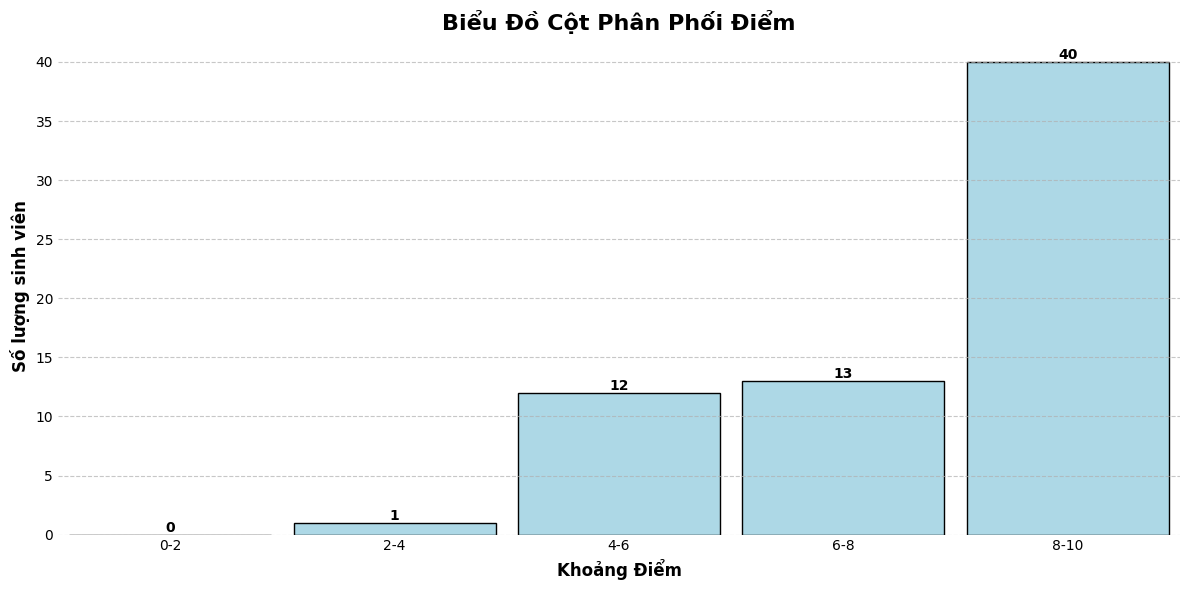

In [16]:
import matplotlib.pyplot as plt

dic = {}
for i in range(0, 9, 2):
    key_name = (i, i+2)
    dic[key_name] = []

dic[(0,2)] = sum(1 for x in grades if x >= 0 and x <= 2)
dic[(2,4)] = sum(1 for x in grades if x > 2 and x <= 4)
dic[(4,6)] = sum(1 for x in grades if x > 4 and x <= 6)
dic[(6,8)] = sum(1 for x in grades if x > 6 and x <= 8)
dic[(8,10)] = sum(1 for x in grades if x > 8 and x <= 10)

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 1.8  
light_blue = '#ADD8E6'  

for i, ((start, end), value) in enumerate(dic.items()):
    ax.bar([i * 2], [value], width=bar_width, edgecolor='black', align='center', color=light_blue)

ax.set_xlabel('Khoảng Điểm', fontsize=12, fontweight='bold')
ax.set_ylabel('Số lượng sinh viên', fontsize=12, fontweight='bold')
ax.set_title('Biểu Đồ Cột Phân Phối Điểm', fontsize=16, fontweight='bold')

ax.set_xticks(range(0, 10, 2))
ax.set_xticklabels([f'{i}-{i+2}' for i in range(0, 10, 2)])
ax.set_xlim(-1, 9)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', which='both', length=0)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for i, ((start, end), value) in enumerate(dic.items()):
    ax.text(i * 2, value, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

> ### Nhận xét: 
> * Hình dạng phân bố: Phân bố điểm này có dạng lệch phải. Đa số điểm tập trung ở phía bên phải của biểu đồ, tức là ở các khoảng điểm cao hơn.
> * Phân bố: Khoảng điểm có sự phân bố đông sinh viên nhất là khoảng từ $8$ - $10$ điểm.

## Tiền xử lý + phân tích dữ liệu để trả lời cho câu hỏi 2

*Câu hỏi 2: Câu quiz nào có nhiều bạn làm sai nhất, câu nào có nhiều bạn làm sai nhì, ...?*

Ta có thể lưu kết quả vào một dictionary, trong đó: key là tên của cột ứng với câu quiz, value là điểm trung bình của cột. Dictionary này được sort tăng dần theo value.

***Sinh viên hoàn thành tiếp phần này như bài tập về nhà***

In [14]:
scale={}
for i in cols.items():
    if 'Q.' in i[0]:
        scale[i[0]]=round(sum(i[1])/len(i[1]),2)
scale_asc=sorted(scale.items(), key=lambda x:x[1]) # sắp thứ tự điểm trung bình bằng hàm sorted, mặc định là theo thứ tự từ bé đến lớn
scale_asc

[('Q. 13 /0.53', 0.36),
 ('Q. 14 /0.53', 0.36),
 ('Q. 5 /0.53', 0.39),
 ('Q. 6 /0.53', 0.39),
 ('Q. 18 /0.53', 0.39),
 ('Q. 19 /0.53', 0.39),
 ('Q. 15 /0.53', 0.41),
 ('Q. 17 /0.53', 0.41),
 ('Q. 1 /0.53', 0.43),
 ('Q. 2 /0.53', 0.45),
 ('Q. 3 /0.53', 0.45),
 ('Q. 4 /0.53', 0.45),
 ('Q. 11 /0.53', 0.46),
 ('Q. 7 /0.53', 0.47),
 ('Q. 9 /0.53', 0.47),
 ('Q. 16 /0.53', 0.47),
 ('Q. 8 /0.53', 0.48),
 ('Q. 10 /0.53', 0.48),
 ('Q. 12 /0.53', 0.5)]

Dựa vào kết quả trên, ta nhận thấy câu quiz có nhiều bạn làm sai nhất chính là câu $13$ và $14$, bởi $2$ câu này có điểm trung bình thấp nhất - chỉ $0.36$. Trong khi đó, câu có nhiều bạn làm đúng nhất câu $12$, với số điểm trung bình đạt được là $0.5$